In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# Load datasets

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/test.csv")
stores = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/stores.csv")
oil = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/oil.csv")
holidays = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/holidays_events.csv")

In [ ]:
train.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
print(train.isnull().sum())
print(oil.isnull().sum())
print(holidays.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
date           0
dcoilwtico    43
dtype: int64
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


In [ ]:
oil.shape

(1218, 2)

In [ ]:
oil.dtypes

,0
date,object
dcoilwtico,float64


In [ ]:
oil["dcoilwtico"] = oil["dcoilwtico"].interpolate(method="linear")

In [ ]:
print(oil.isnull().sum())

date          0
dcoilwtico    1
dtype: int64


In [ ]:
train.info()
test.info()
oil.info()
stores.info()
holidays.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      -------

In [ ]:
# Convert date columns to datetime objects
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays['date'] = pd.to_datetime(holidays['date'])


In [ ]:
train.info()
test.info()
oil.info()
stores.info()
holidays.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB
<class 'pandas.core.f

In [ ]:
# Merge datasets
train = pd.merge(train, stores, on='store_nbr', how='left')
train = pd.merge(train, oil, on='date', how='left')
train = pd.merge(train, holidays, on='date', how='left')



In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [ ]:
print(train.isnull().sum())

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type_x               0
cluster              0
dcoilwtico      880308
type_y         2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64


# Time-based Features:

In [ ]:
# Extract date features
train['day'] = train['date'].dt.day
train['week'] = train['date'].dt.isocalendar().week
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['dayofweek'] = train['date'].dt.dayofweek


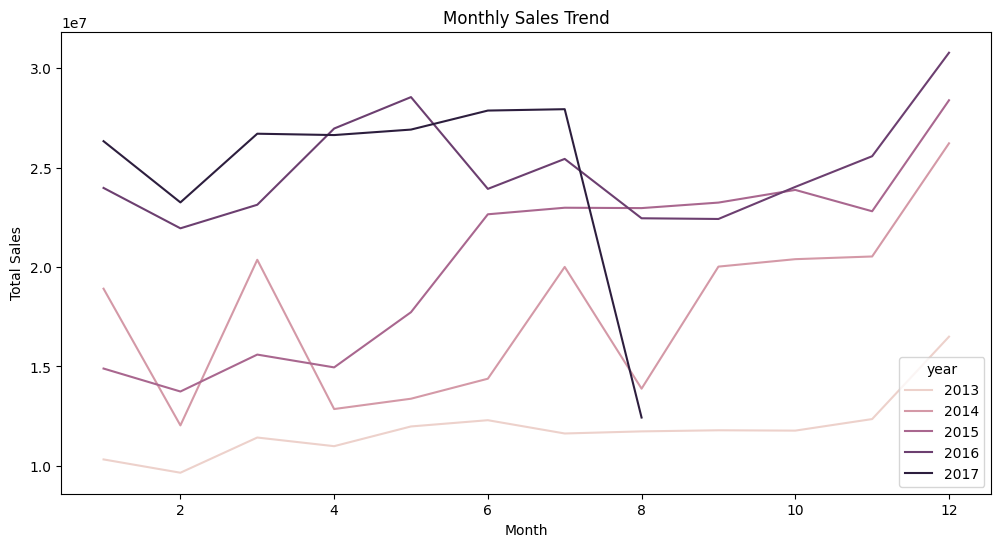

,month,sales
0,1,1.888843e+07
1,2,1.612745e+07
2,3,1.944570e+07
3,4,1.848202e+07
4,5,1.971051e+07
5,6,2.022724e+07
6,7,2.159879e+07
7,8,1.669448e+07
8,9,1.936842e+07
9,10,2.002009e+07


In [ ]:
# Group sales by month and year to analyze seasonal trends
monthly_sales = train.groupby(['year', 'month'])['sales'].sum().reset_index()

# Optionally, you can calculate other aggregate measures like mean or median
# monthly_sales = train.groupby(['year', 'month'])['sales'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot to visualize the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='sales', hue='year', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


# Further analysis:
# 1. Calculate the average sales for each month across all years
average_monthly_sales = monthly_sales.groupby('month')['sales'].mean().reset_index()
average_monthly_sales


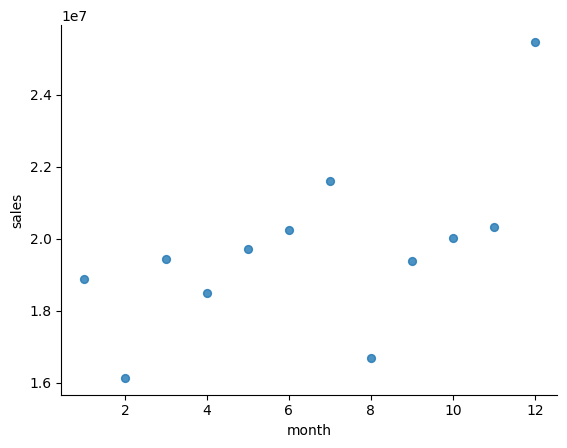

In [ ]:
average_monthly_sales.plot(kind='scatter', x='month', y='sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Potential outlier months:     month         sales   zscore
11     12  2.547052e+07  2.54509


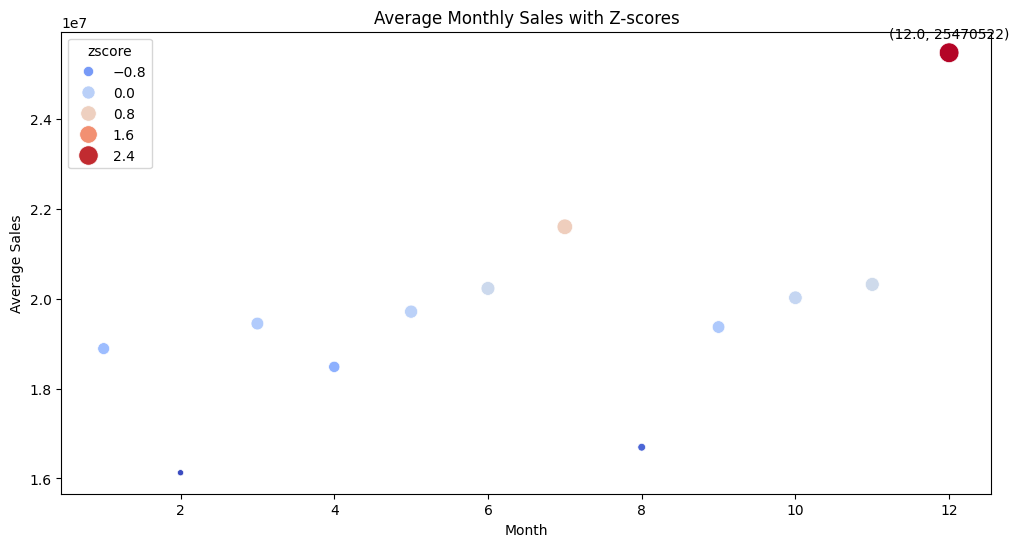

No holiday found with the name 'Christmas'. Please verify holiday names in the holidays dataset.


In [ ]:
from scipy import stats

# Calculate z-scores for average monthly sales
average_monthly_sales['zscore'] = stats.zscore(average_monthly_sales['sales'])

# Identify outliers based on z-score threshold (e.g., |z-score| > 2)
outliers = average_monthly_sales[abs(average_monthly_sales['zscore']) > 2]
print("Potential outlier months:", outliers)

# Visualize average monthly sales with z-scores
plt.figure(figsize=(12, 6))
sns.scatterplot(x='month', y='sales', data=average_monthly_sales, size='zscore', sizes=(20, 200), hue='zscore', palette="coolwarm")
plt.title('Average Monthly Sales with Z-scores')
plt.xlabel('Month')
plt.ylabel('Average Sales')

# Annotate outlier points on the plot
for index, row in outliers.iterrows():
    plt.annotate(f"({row['month']}, {row['sales']:.0f})", (row['month'], row['sales']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


# Analyze sales trends considering holidays and events (example for one specific holiday)

# Example:  Find a specific holiday
# Replace 'Christmas' with the actual holiday name you want to investigate.
holiday_name = 'Christmas'
specific_holiday = holidays[holidays['description'].str.contains(holiday_name, case=False, na=False)]

# if there are holidays with that name
if not specific_holiday.empty:
    # Merge with sales data
    holiday_sales = pd.merge(train, specific_holiday, on='date', how='inner')

    # Aggregate sales for days near the holiday
    holiday_sales_by_month = holiday_sales.groupby('month')['sales'].mean().reset_index()

    # Plot sales for days near the holiday
    plt.figure(figsize=(8, 6))
    sns.barplot(x='month', y='sales', data=holiday_sales_by_month)
    plt.title(f'Average Sales Around {holiday_name}')
    plt.xlabel('Month')
    plt.ylabel('Average Sales')
    plt.show()
else:
    print(f"No holiday found with the name '{holiday_name}'. Please verify holiday names in the holidays dataset.")


<ipython-input-24-4f2aa0dc0b0b>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  monthly_data['holiday_count'].fillna(0, inplace=True)  # Fill NaN with 0 for months with no holidays


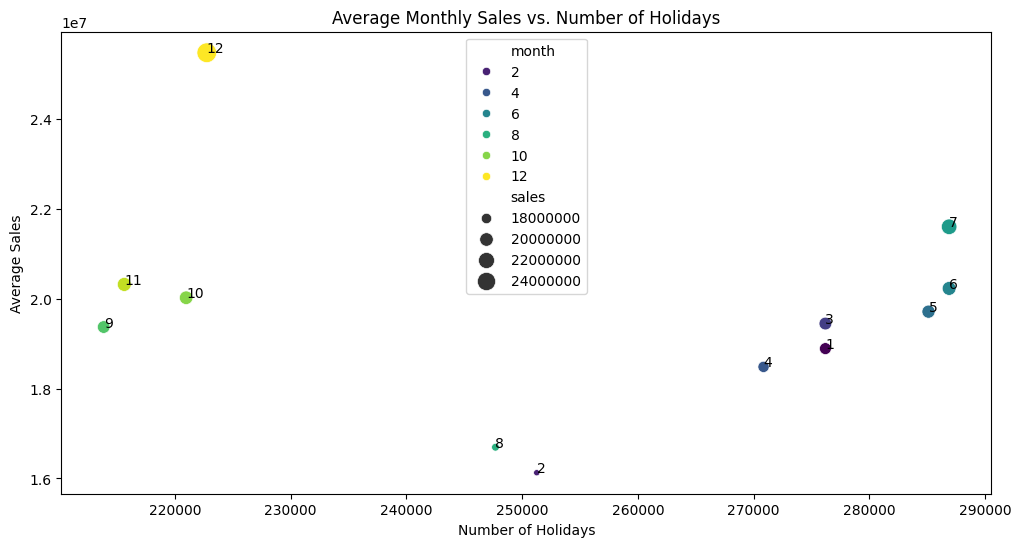

Correlation between sales and holiday counts: -0.17730743917042502


In [ ]:
# Analyze sales trends considering holidays and events

# Group holidays by month and count the number of holidays in each month
holidays_by_month = train.groupby('month')['date'].count().reset_index()
holidays_by_month.rename(columns={'date': 'holiday_count'}, inplace=True)


# Merge holiday counts with average monthly sales
monthly_data = pd.merge(average_monthly_sales, holidays_by_month, on='month', how='left')
monthly_data['holiday_count'].fillna(0, inplace=True)  # Fill NaN with 0 for months with no holidays


# Visualize the relationship between holiday counts and average monthly sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='holiday_count', y='sales', data=monthly_data, size='sales', sizes=(20, 200), hue='month', palette='viridis')
plt.title('Average Monthly Sales vs. Number of Holidays')
plt.xlabel('Number of Holidays')
plt.ylabel('Average Sales')

# Add annotations for each month
for i in range(monthly_data.shape[0]):
  plt.annotate(monthly_data['month'].iloc[i], (monthly_data['holiday_count'].iloc[i], monthly_data['sales'].iloc[i]))


plt.show()

#Further analysis
# Calculated correlation between sales and holiday counts or perform regression analysis to quantify the relationship.
# Analyzed individual holidays separately as done in the previous example.
correlation = monthly_data['sales'].corr(monthly_data['holiday_count'])
print(f"Correlation between sales and holiday counts: {correlation}")


# Event-based Features:

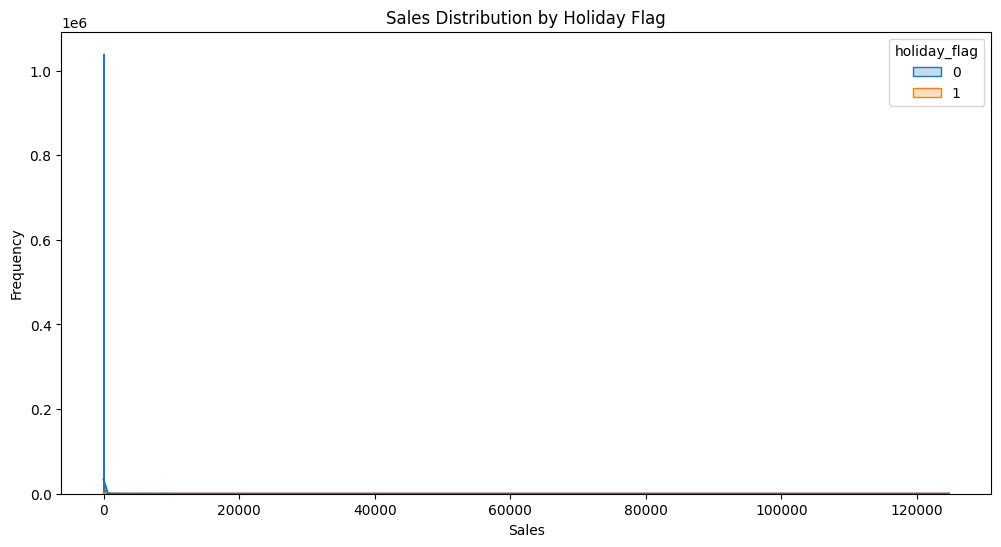

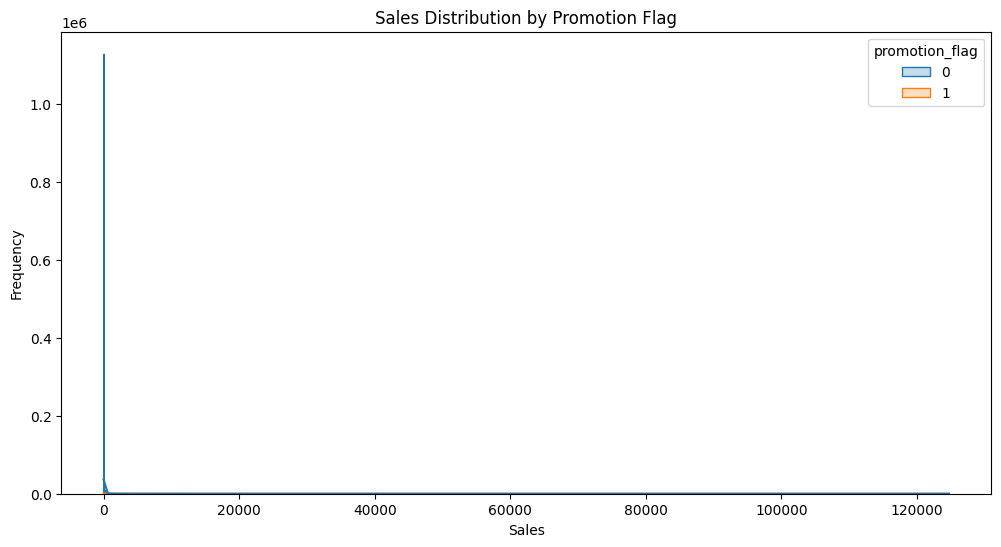

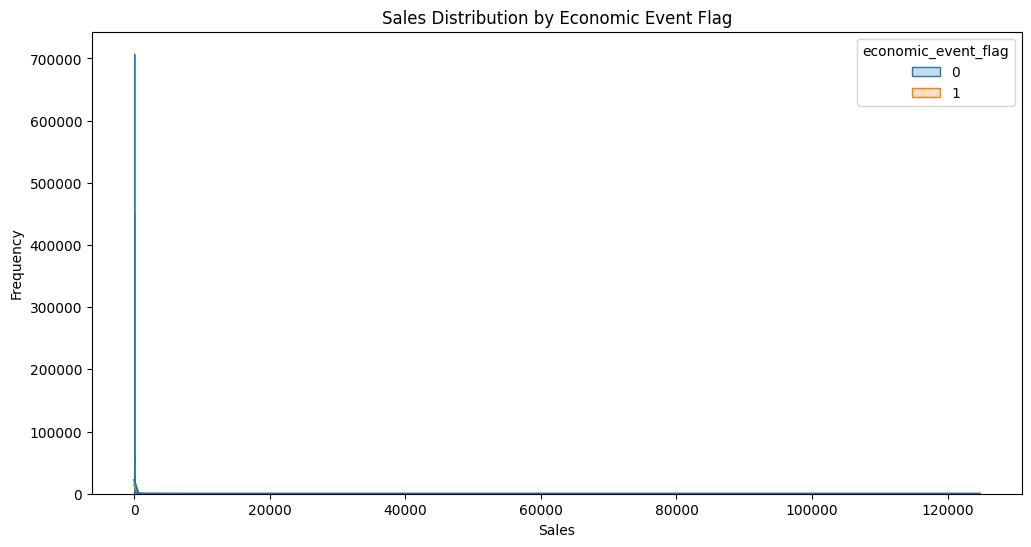

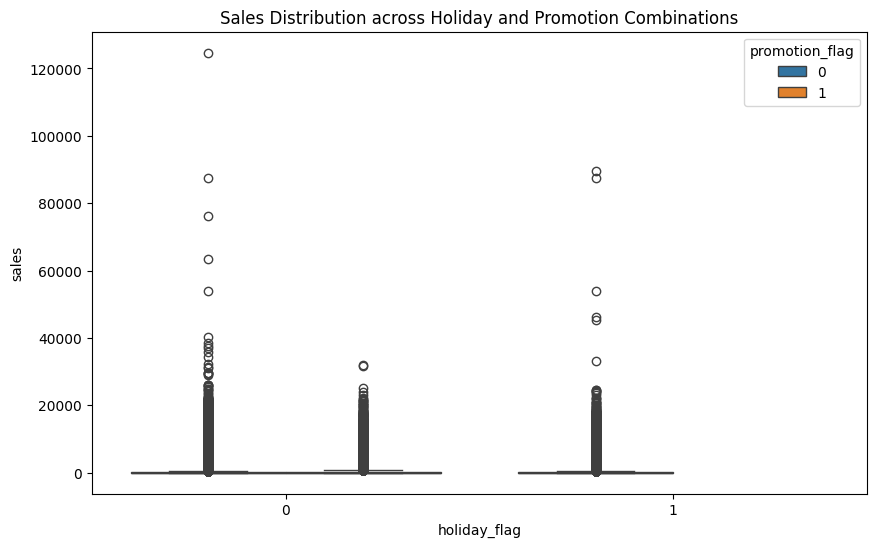

,holiday_flag,promotion_flag,economic_event_flag,sales
0,0,0,0,408.163975
1,0,0,1,228.933462
2,0,1,0,523.298798
3,0,1,1,291.631000
4,1,0,0,405.866285
5,1,0,1,243.647226


In [ ]:
# Create binary flags for holidays
train['holiday_flag'] = 0
train.loc[train['type_y'] == 'Holiday', 'holiday_flag'] = 1

# Create binary flags for promotions
train['promotion_flag'] = 0
train.loc[train['type_y'] == 'Transfer', 'promotion_flag'] = 1
train.loc[train['type_y'] == 'Additional', 'promotion_flag'] = 1
train.loc[train['type_y'] == 'Bridge', 'promotion_flag'] = 1

# Assuming 'dcoilwtico' represents an economic indicator (oil price)
# You can define thresholds for economic events and create flags based on them.
# Example: Consider oil prices above a certain threshold as an economic event.
train['economic_event_flag'] = 0  # Initialize the flag
oil_price_threshold = 70  # Define your threshold
train.loc[train['dcoilwtico'] > oil_price_threshold, 'economic_event_flag'] = 1


# Visualizations for the new binary flags
plt.figure(figsize=(12, 6))

# Plot sales distribution for holidays
sns.histplot(data=train, x='sales', hue='holiday_flag', kde=True, element="step")
plt.title('Sales Distribution by Holiday Flag')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
# Plot sales distribution for promotions
sns.histplot(data=train, x='sales', hue='promotion_flag', kde=True, element="step")
plt.title('Sales Distribution by Promotion Flag')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
# Plot sales distribution for economic events
sns.histplot(data=train, x='sales', hue='economic_event_flag', kde=True, element="step")
plt.title('Sales Distribution by Economic Event Flag')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


# Example: Box plot for Sales across different holiday and promotion combinations
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday_flag', y='sales', hue='promotion_flag', data=train)
plt.title('Sales Distribution across Holiday and Promotion Combinations')
plt.show()

# Example: Analyze sales based on all flags together
# Group by all the flags and calculate the mean sales
sales_by_flags = train.groupby(['holiday_flag', 'promotion_flag', 'economic_event_flag'])['sales'].mean().reset_index()
sales_by_flags



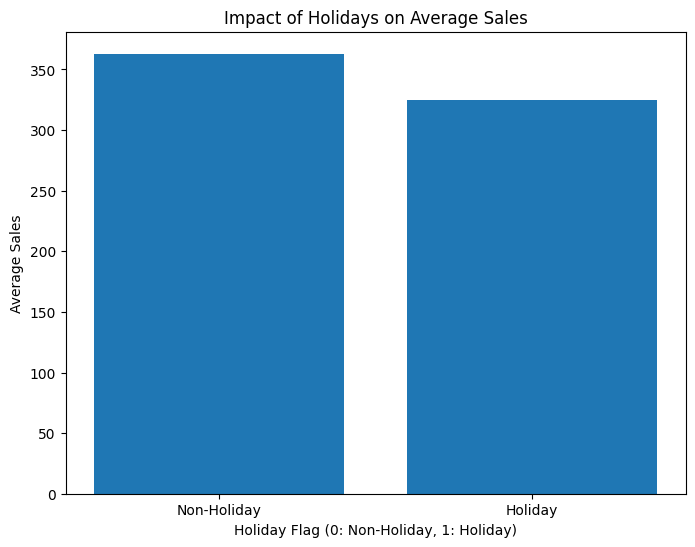

In [ ]:
# Calculate average sales for holidays and non-holidays
average_sales = sales_by_flags.groupby('holiday_flag')['sales'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(average_sales.index, average_sales.values)
plt.xlabel("Holiday Flag (0: Non-Holiday, 1: Holiday)")
plt.ylabel("Average Sales")
plt.title("Impact of Holidays on Average Sales")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()


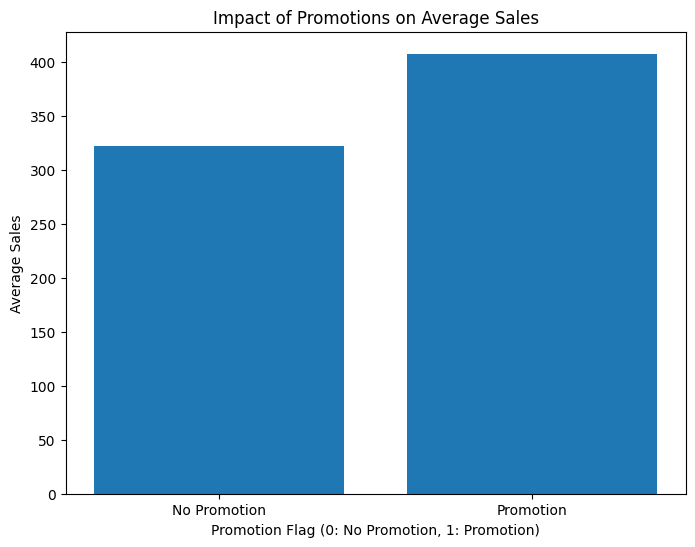

In [ ]:
# Calculate average sales for promotions and non-promotions
average_sales_promo = sales_by_flags.groupby('promotion_flag')['sales'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(average_sales_promo.index, average_sales_promo.values)
plt.xlabel("Promotion Flag (0: No Promotion, 1: Promotion)")
plt.ylabel("Average Sales")
plt.title("Impact of Promotions on Average Sales")
plt.xticks([0, 1], ['No Promotion', 'Promotion'])
plt.show()


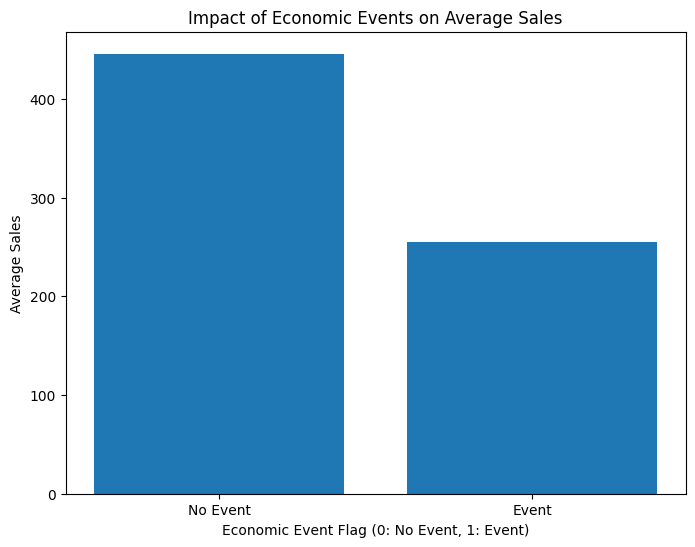

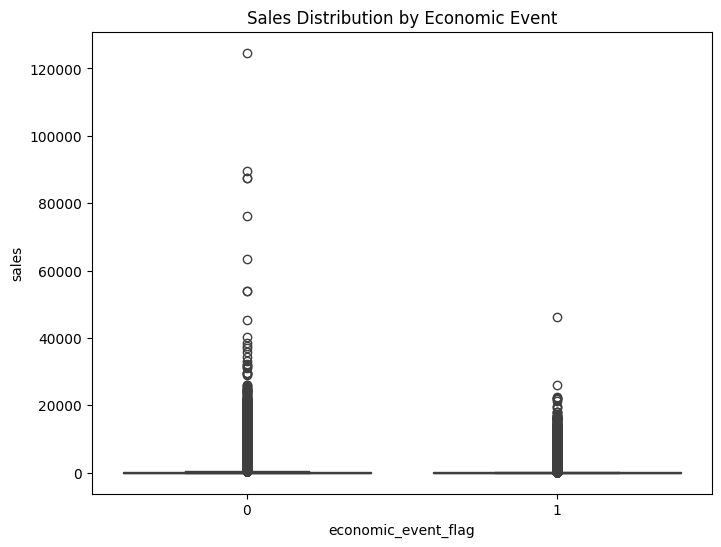

In [ ]:
# Analyze the impact of economic events on sales.

# Calculate average sales for economic events and non-events
average_sales_economic = sales_by_flags.groupby('economic_event_flag')['sales'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(average_sales_economic.index, average_sales_economic.values)
plt.xlabel("Economic Event Flag (0: No Event, 1: Event)")
plt.ylabel("Average Sales")
plt.title("Impact of Economic Events on Average Sales")
plt.xticks([0, 1], ['No Event', 'Event'])
plt.show()

#Further analysis
# Statistical tests (e.g., t-tests) could be performed to determine if the difference in sales between economic event and non-event periods is statistically significant.

# Boxplot to visualize sales distribution for economic events
plt.figure(figsize=(8, 6))
sns.boxplot(x='economic_event_flag', y='sales', data=train)
plt.title('Sales Distribution by Economic Event')
plt.show()


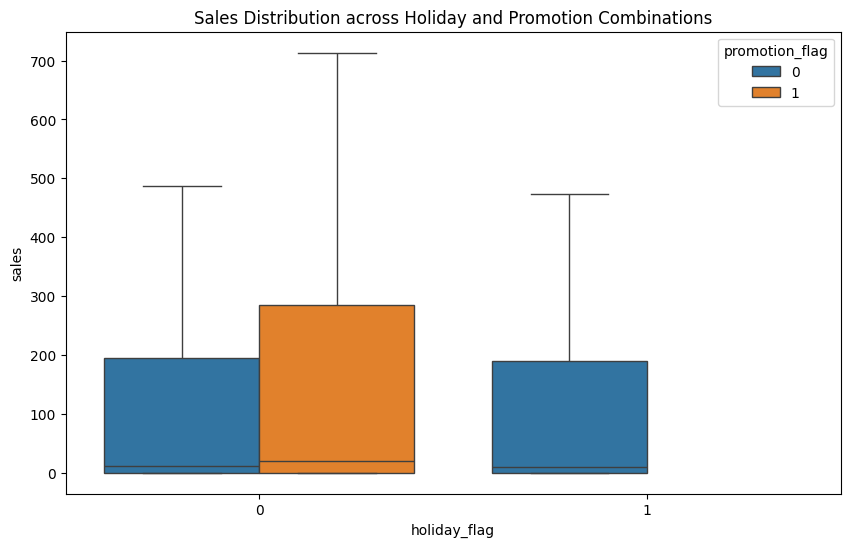

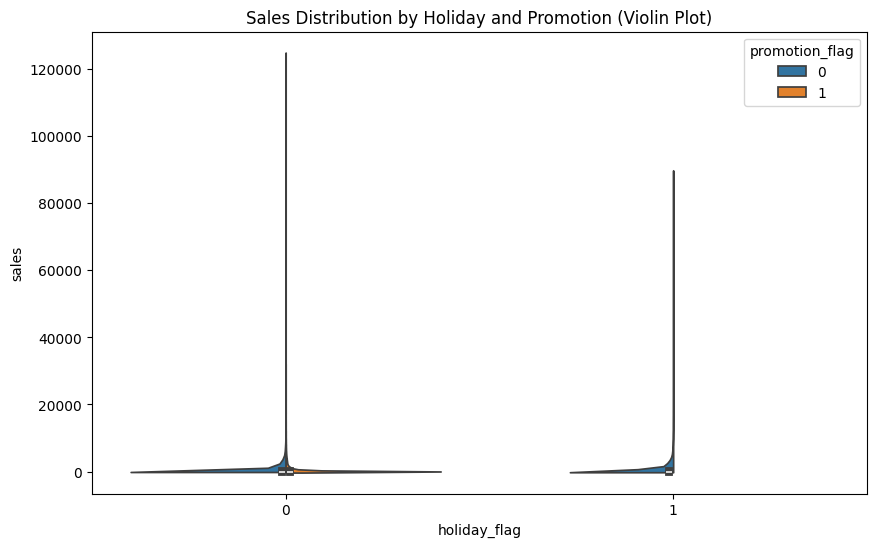

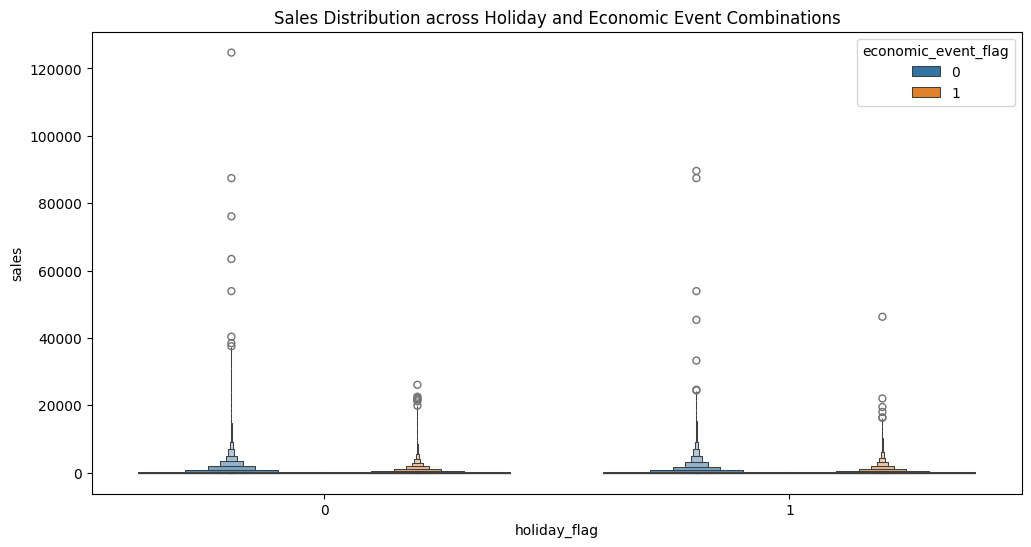

In [ ]:
# Create a combined visualization (e.g., boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday_flag', y='sales', hue='promotion_flag', data=train, showfliers=False) #showfliers=False to remove outliers
plt.title('Sales Distribution across Holiday and Promotion Combinations')
plt.show()

# Create another combined visualization (violinplot)
plt.figure(figsize=(10,6))
sns.violinplot(x='holiday_flag', y='sales', hue='promotion_flag', data=train, split=True)
plt.title('Sales Distribution by Holiday and Promotion (Violin Plot)')
plt.show()

#Further analysis
#You can create similar visualizations by replacing 'promotion_flag' with 'economic_event_flag' or combining all three flags.
plt.figure(figsize=(12, 6))
sns.boxenplot(x="holiday_flag", y="sales", hue="economic_event_flag", data=train)
plt.title('Sales Distribution across Holiday and Economic Event Combinations')
plt.show()


        date  is_payday
0 2013-01-01      False
1 2013-01-01      False
2 2013-01-01      False
3 2013-01-01      False
4 2013-01-01      False
5 2013-01-01      False
6 2013-01-01      False
7 2013-01-01      False
8 2013-01-01      False
9 2013-01-01      False
is_payday
False    358.780335
True     362.494890
Name: sales, dtype: float64


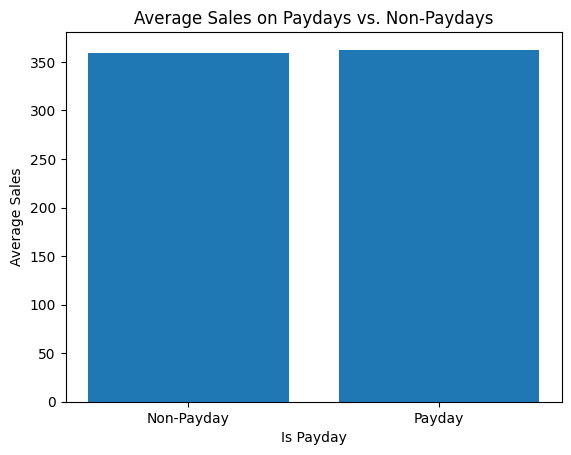

In [ ]:
# Function to identify government payday
def is_government_payday(date):
  """Checks if a given date is a government payday (15th or last day of the month).

  Args:
    date: A pandas Timestamp object representing the date.

  Returns:
    True if the date is a government payday, False otherwise.
  """
  if date.day == 15 or date.day == pd.Timestamp(date.year, date.month, 1).days_in_month:
    return True
  return False

# Apply the function to your 'date' column
train['is_payday'] = train['date'].apply(is_government_payday)

# Example usage:
print(train[['date', 'is_payday']].head(10))

#Further analysis
# Analyze sales on payday vs. non-payday
# Group by 'is_payday' and calculate average sales
payday_sales = train.groupby('is_payday')['sales'].mean()
print(payday_sales)

# Visualize the difference in average sales
import matplotlib.pyplot as plt
plt.bar(payday_sales.index, payday_sales.values)
plt.xlabel("Is Payday")
plt.ylabel("Average Sales")
plt.title("Average Sales on Paydays vs. Non-Paydays")
plt.xticks([0, 1], ['Non-Payday', 'Payday'])
plt.show()


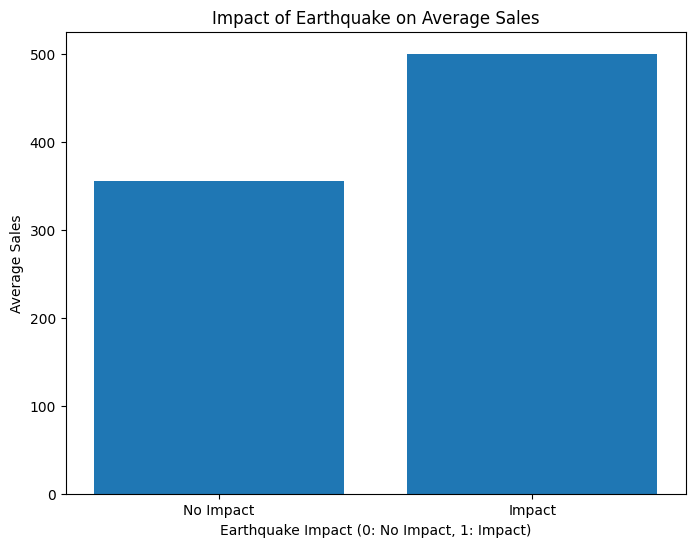

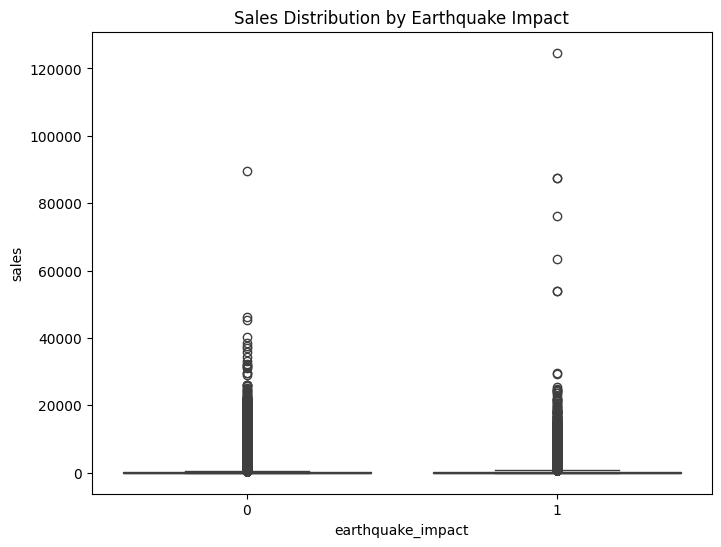

In [ ]:
# Earthquake impact feature engineering
train['earthquake_impact'] = 0
train.loc[(train['date'] >= pd.to_datetime('2016-04-16')) & (train['date'] <= pd.to_datetime('2016-05-16')), 'earthquake_impact'] = 1

# Analyze sales trends considering earthquake impact
earthquake_sales = train.groupby('earthquake_impact')['sales'].mean()

# Visualize the difference in average sales
plt.figure(figsize=(8, 6))
plt.bar(earthquake_sales.index, earthquake_sales.values)
plt.xlabel("Earthquake Impact (0: No Impact, 1: Impact)")
plt.ylabel("Average Sales")
plt.title("Impact of Earthquake on Average Sales")
plt.xticks([0, 1], ['No Impact', 'Impact'])
plt.show()


#Further analysis
# Statistical tests (e.g., t-tests) could be performed to determine if the difference in sales before and after the earthquake is statistically significant.
#You could also create a box plot comparing sales before and after the earthquake.

# Boxplot to visualize sales distribution for earthquake impact
plt.figure(figsize=(8, 6))
sns.boxplot(x='earthquake_impact', y='sales', data=train)
plt.title('Sales Distribution by Earthquake Impact')
plt.show()


T-statistic: -32.70609076225577
P-value: 1.4052977837413238e-234
The difference in sales before and after the earthquake is statistically significant.


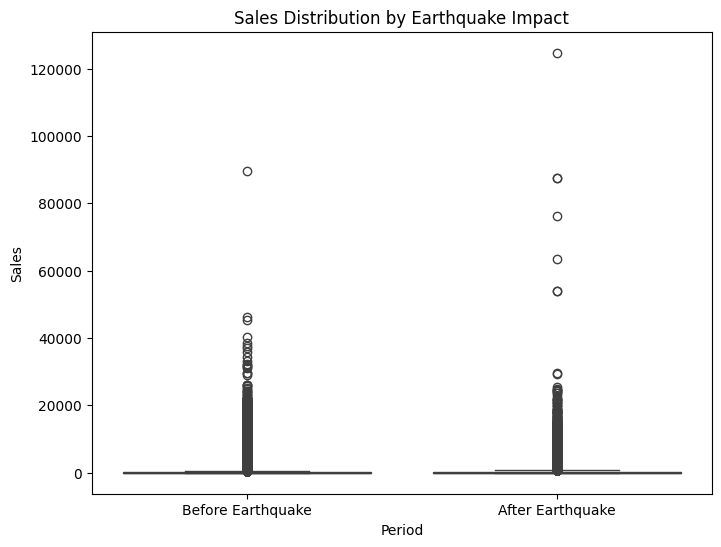

In [ ]:
# Perform a t-test to compare sales before and after the earthquake
before_earthquake = train.loc[train['earthquake_impact'] == 0, 'sales']
after_earthquake = train.loc[train['earthquake_impact'] == 1, 'sales']

t_statistic, p_value = stats.ttest_ind(before_earthquake, after_earthquake)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The difference in sales before and after the earthquake is statistically significant.")
else:
    print("The difference in sales before and after the earthquake is not statistically significant.")


# Create a box plot comparing sales before and after the earthquake
plt.figure(figsize=(8, 6))
sns.boxplot(x='earthquake_impact', y='sales', data=train)
plt.title('Sales Distribution by Earthquake Impact')
plt.xticks([0, 1], ['Before Earthquake', 'After Earthquake'])
plt.xlabel("Period")
plt.ylabel("Sales")
plt.show()


# Rolling Statistics:

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


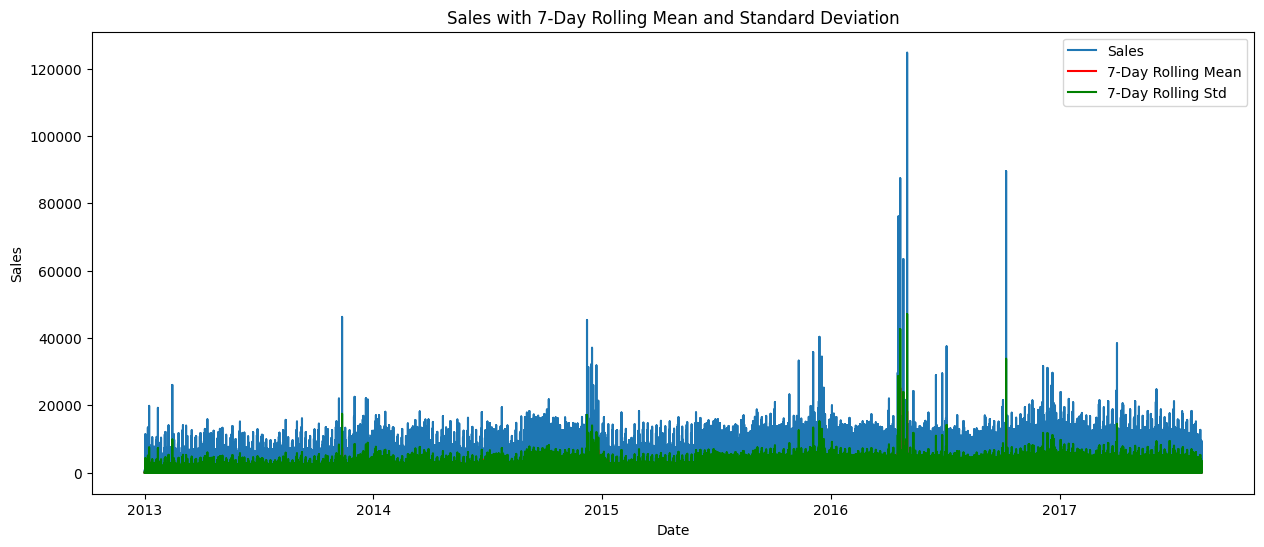

In [ ]:
# Calculate rolling mean and standard deviation
window_size = 7  # Example window size (adjust as needed)
train['rolling_mean'] = train['sales'].rolling(window=window_size, min_periods=1).mean()
train['rolling_std'] = train['sales'].rolling(window=window_size, min_periods=1).std()

# Visualize rolling statistics
plt.figure(figsize=(15, 6))
plt.plot(train['date'], train['sales'], label='Sales')
plt.plot(train['date'], train['rolling_mean'], label=f'{window_size}-Day Rolling Mean', color='red')
plt.plot(train['date'], train['rolling_std'], label=f'{window_size}-Day Rolling Std', color='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title(f'Sales with {window_size}-Day Rolling Mean and Standard Deviation')
plt.legend()
plt.show()


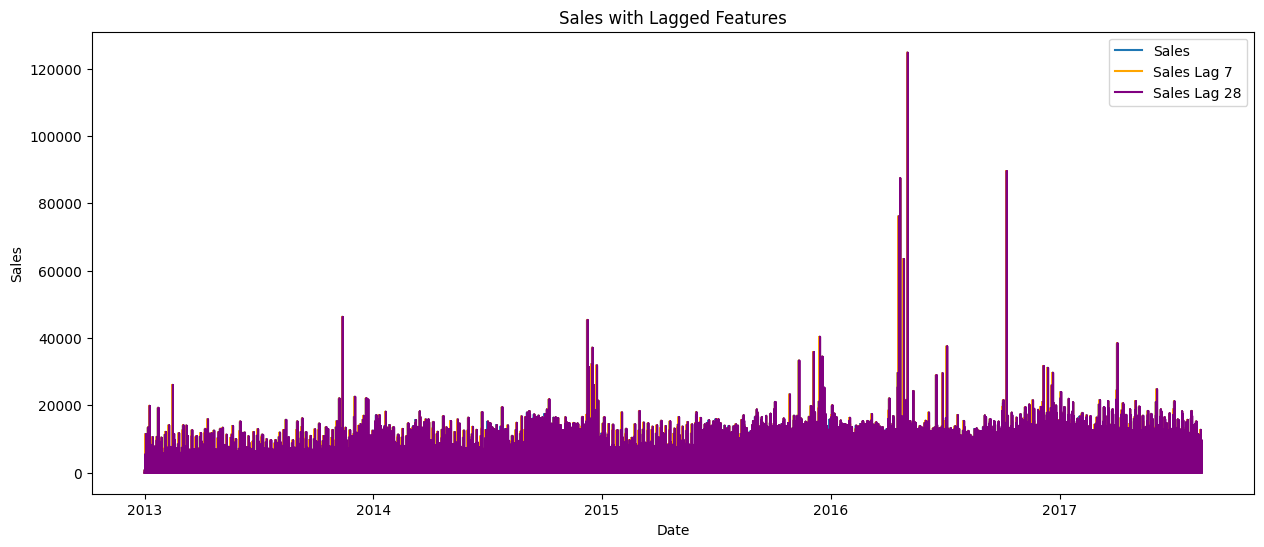

Correlation between sales and 7-day lagged sales: -0.004555995880370543
Correlation between sales and 28-day lagged sales: 0.1310388475064793


In [ ]:
# Lagged Features
train['sales_lag_7'] = train.groupby('store_nbr')['sales'].shift(7)
train['sales_lag_28'] = train.groupby('store_nbr')['sales'].shift(28)

# Visualize Lagged Features
plt.figure(figsize=(15, 6))
plt.plot(train['date'], train['sales'], label='Sales')
plt.plot(train['date'], train['sales_lag_7'], label='Sales Lag 7', color='orange')
plt.plot(train['date'], train['sales_lag_28'], label='Sales Lag 28', color='purple')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales with Lagged Features')
plt.legend()
plt.show()

correlation_lag7 = train['sales'].corr(train['sales_lag_7'])
correlation_lag28 = train['sales'].corr(train['sales_lag_28'])

print(f"Correlation between sales and 7-day lagged sales: {correlation_lag7}")
print(f"Correlation between sales and 28-day lagged sales: {correlation_lag28}")


# Store-Specific Aggregations:

type_y
Additional    487.628925
Bridge        446.750854
Event         425.660065
Holiday       358.433812
Transfer      467.753110
Work Day      372.157524
Name: sales, dtype: float64


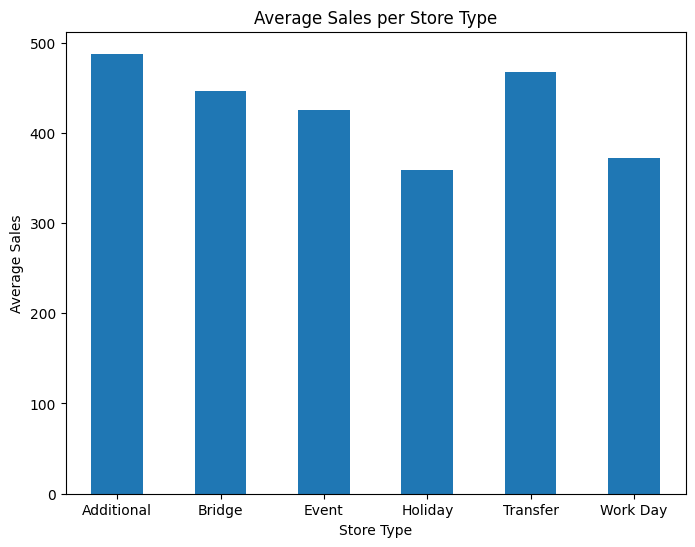

In [ ]:
# Compute average sales per store type
average_sales_by_type = train.groupby('type_y')['sales'].mean()

# Print the result
print(average_sales_by_type)

# Visualize the average sales per store type
plt.figure(figsize=(8, 6))
average_sales_by_type.plot(kind='bar')
plt.xlabel("Store Type")
plt.ylabel("Average Sales")
plt.title("Average Sales per Store Type")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


Top-Selling Product Families per Cluster:
     cluster     family         sales
12         1  GROCERY I  1.483284e+07
45         2  GROCERY I  8.649030e+06
78         3  GROCERY I  2.978610e+07
111        4  GROCERY I  1.682519e+07
144        5  GROCERY I  1.671595e+07
177        6  GROCERY I  4.397177e+07
210        7  GROCERY I  6.163853e+06
243        8  GROCERY I  2.768491e+07
276        9  GROCERY I  9.159591e+06
309       10  GROCERY I  3.021405e+07
342       11  GROCERY I  2.880349e+07
375       12  GROCERY I  6.589764e+06
408       13  GROCERY I  2.183388e+07
441       14  GROCERY I  5.394487e+07
474       15  GROCERY I  2.301842e+07
507       16  GROCERY I  4.228880e+06
540       17  GROCERY I  8.404701e+06


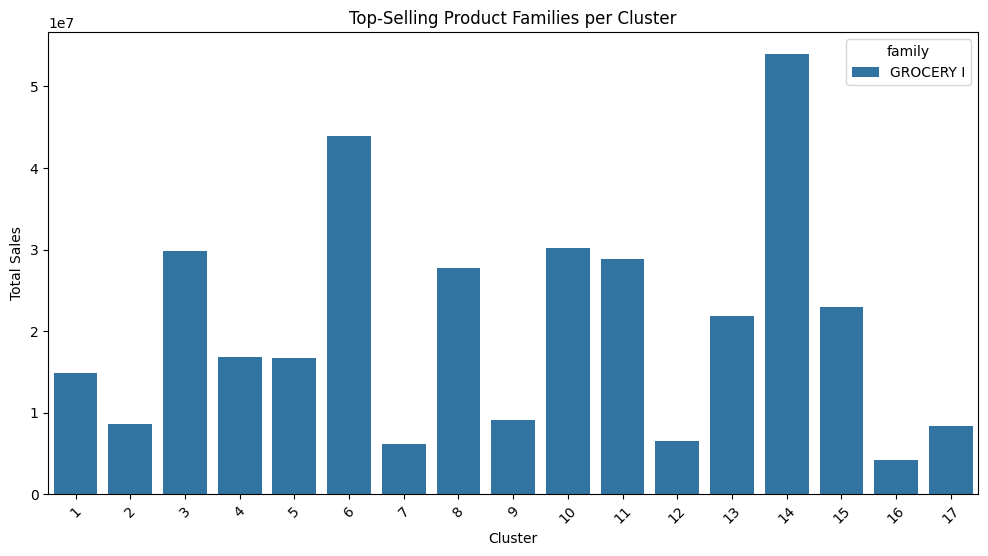

In [ ]:
# Calculate total sales for each product family per cluster
top_selling_families = train.groupby(['cluster', 'family'])['sales'].sum().reset_index()

# Find the top-selling family in each cluster
top_families_per_cluster = top_selling_families.loc[top_selling_families.groupby('cluster')['sales'].idxmax()]

# Print the results
print("Top-Selling Product Families per Cluster:")
print(top_families_per_cluster)

# Visualization: Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='sales', hue='family', data=top_families_per_cluster)
plt.title('Top-Selling Product Families per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


# Exploratory Data Analysis (EDA)

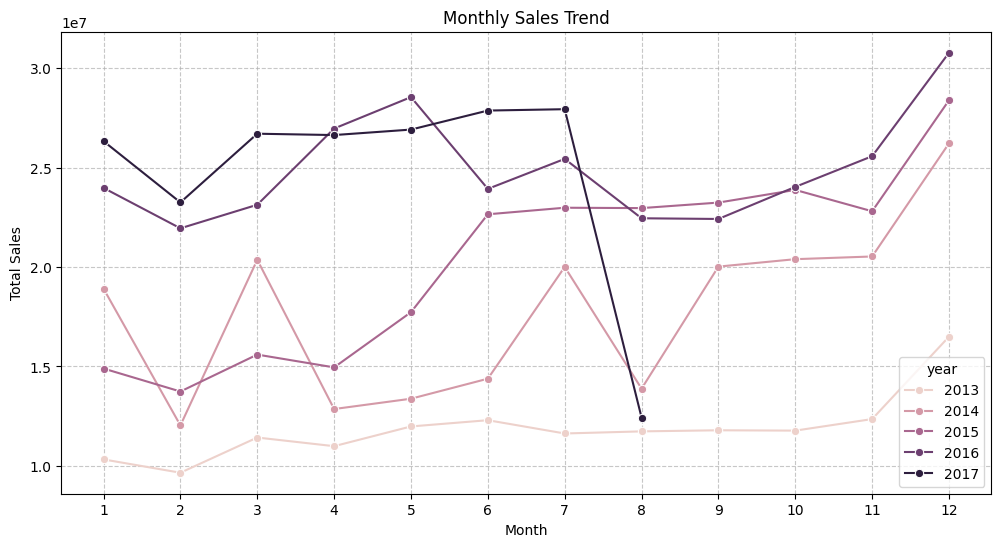

In [ ]:
# Create a line plot to visualize the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='sales', hue='year', data=monthly_sales, marker='o') # Added markers for better visualization
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.7) # Added grid for better readability
plt.xticks(range(1, 13)) # Ensure all months are displayed on x-axis
plt.show()


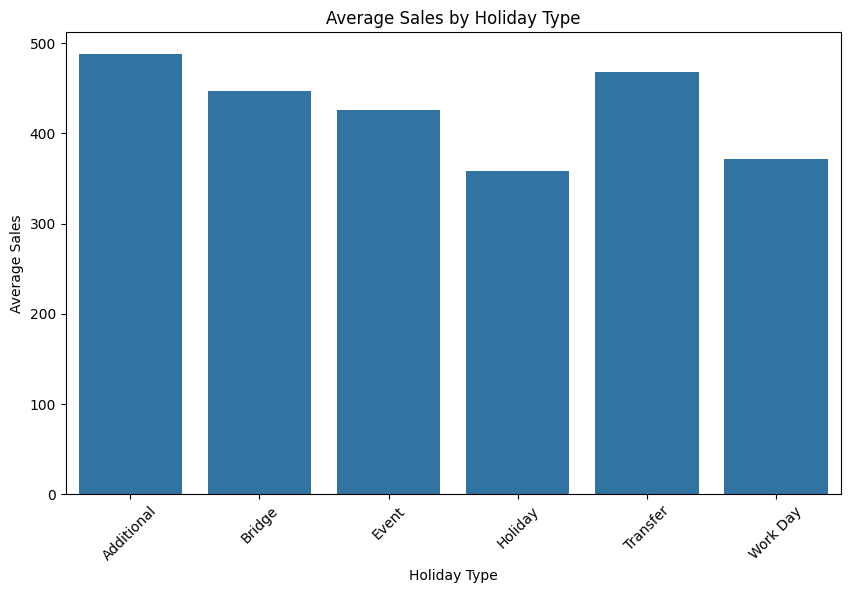

In [ ]:
# Analyze sales trends around holidays

# Group sales data by holiday type and calculate the mean sales
holiday_sales = train.groupby('type_y')['sales'].mean().reset_index()

# Create a bar plot of average sales per holiday type
plt.figure(figsize=(10, 6))
sns.barplot(x='type_y', y='sales', data=holiday_sales)
plt.title('Average Sales by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

# Further analysis
# Compare sales on holidays vs non-holidays
# Analyze sales trends for specific holidays
# Investigate the impact of holiday duration on sales
# Consider interactions between holiday types and promotions
# Compare sales before and after holidays

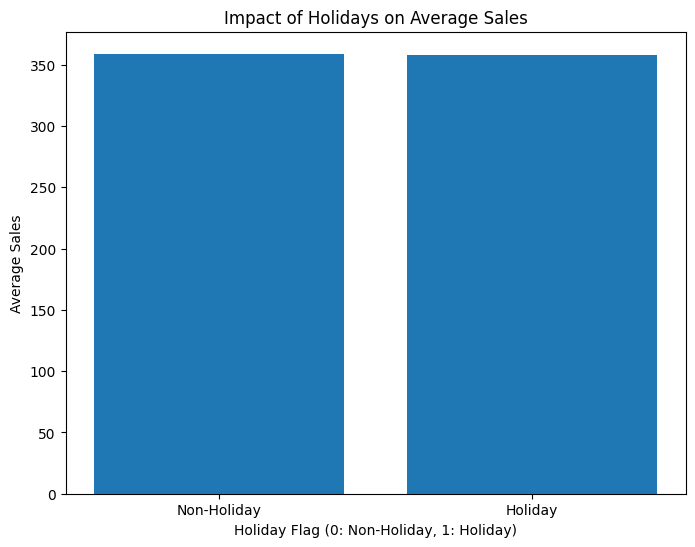

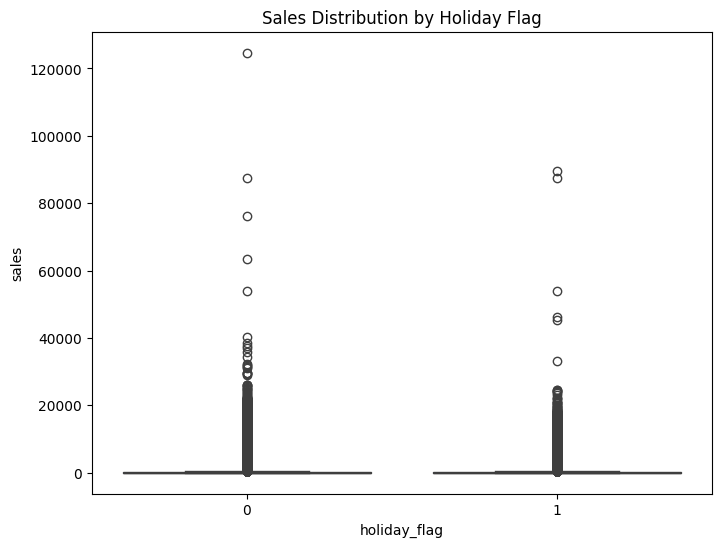

In [ ]:
# Calculate average sales for holidays and non-holidays
average_sales = train.groupby('holiday_flag')['sales'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(average_sales.index, average_sales.values)
plt.xlabel("Holiday Flag (0: Non-Holiday, 1: Holiday)")
plt.ylabel("Average Sales")
plt.title("Impact of Holidays on Average Sales")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

# Further analysis (optional):  Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='holiday_flag', y='sales', data=train)
plt.title('Sales Distribution by Holiday Flag')
plt.show()


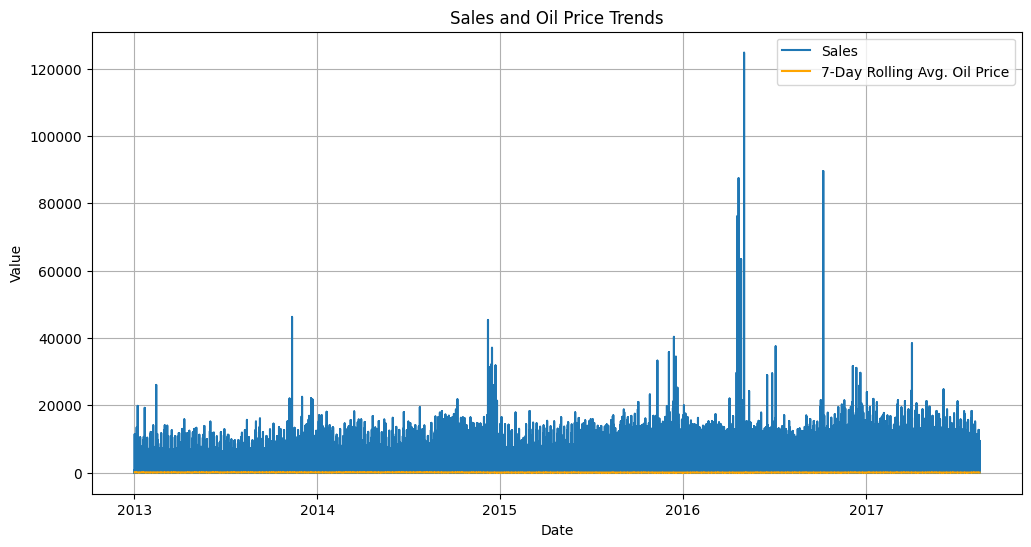

Correlation between sales and oil price (rolling average): -0.07899672663306094


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


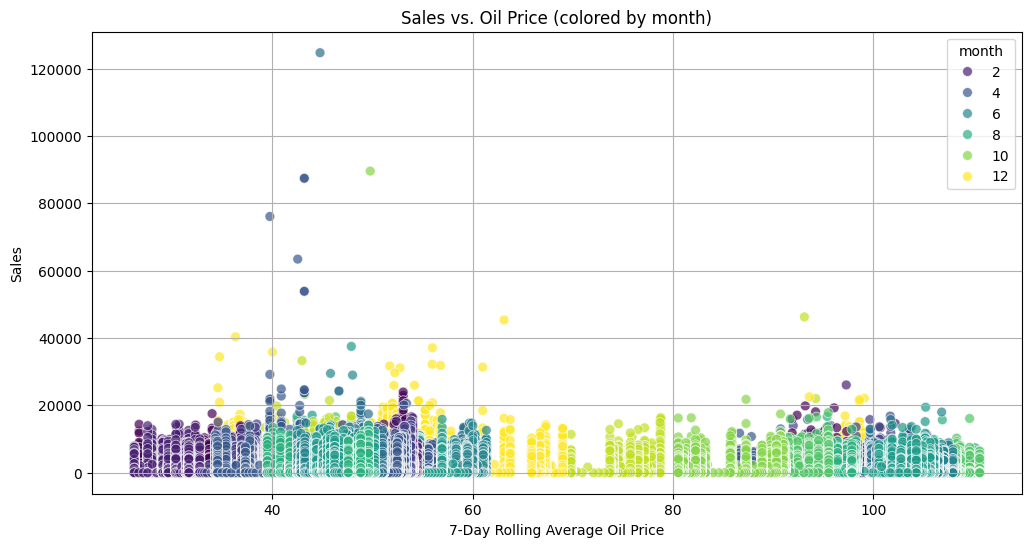

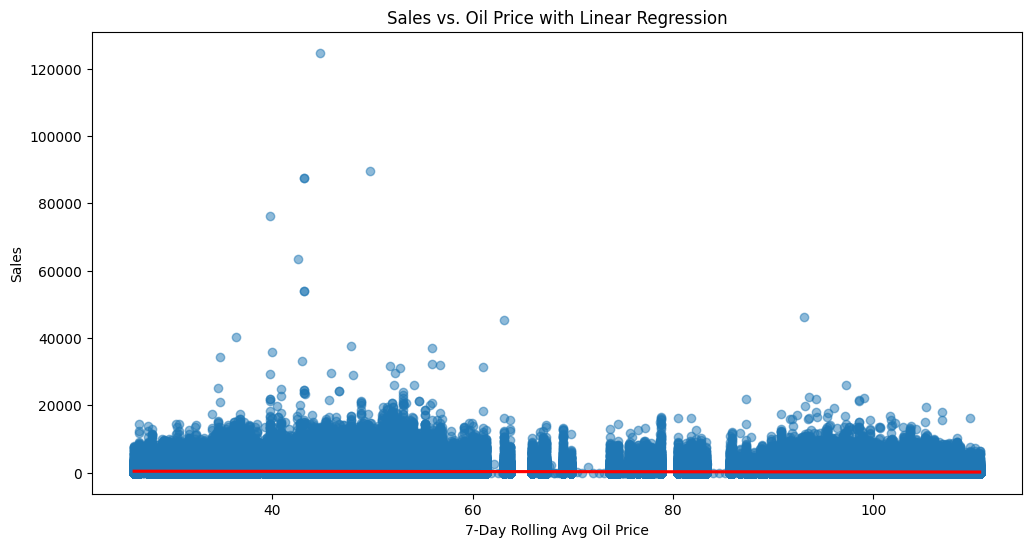

In [ ]:
# Calculate a rolling average of oil prices (e.g., 7-day rolling average)
train['oil_price_rolling_avg'] = train['dcoilwtico'].rolling(window=7).mean()

# Visualize oil prices and sales trends
plt.figure(figsize=(12, 6))
plt.plot(train['date'], train['sales'], label='Sales')
plt.plot(train['date'], train['oil_price_rolling_avg'], label='7-Day Rolling Avg. Oil Price', color='orange')  # Plot rolling avg.
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Sales and Oil Price Trends')
plt.legend()
plt.grid(True)
plt.show()

# Calculate correlation between sales and oil price
correlation = train['sales'].corr(train['oil_price_rolling_avg'])
print(f"Correlation between sales and oil price (rolling average): {correlation}")


# Enhanced visualization: Scatter plot with oil price and sales colored by month
plt.figure(figsize=(12, 6))
sns.scatterplot(x='oil_price_rolling_avg', y='sales', hue='month', data=train, palette='viridis', s=50, alpha=0.7)
plt.xlabel('7-Day Rolling Average Oil Price')
plt.ylabel('Sales')
plt.title('Sales vs. Oil Price (colored by month)')
plt.grid(True)
plt.show()

# Enhanced visualization with regression line
plt.figure(figsize=(12,6))
sns.regplot(x='oil_price_rolling_avg', y='sales', data=train, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('7-Day Rolling Avg Oil Price')
plt.ylabel('Sales')
plt.title('Sales vs. Oil Price with Linear Regression')
plt.show()






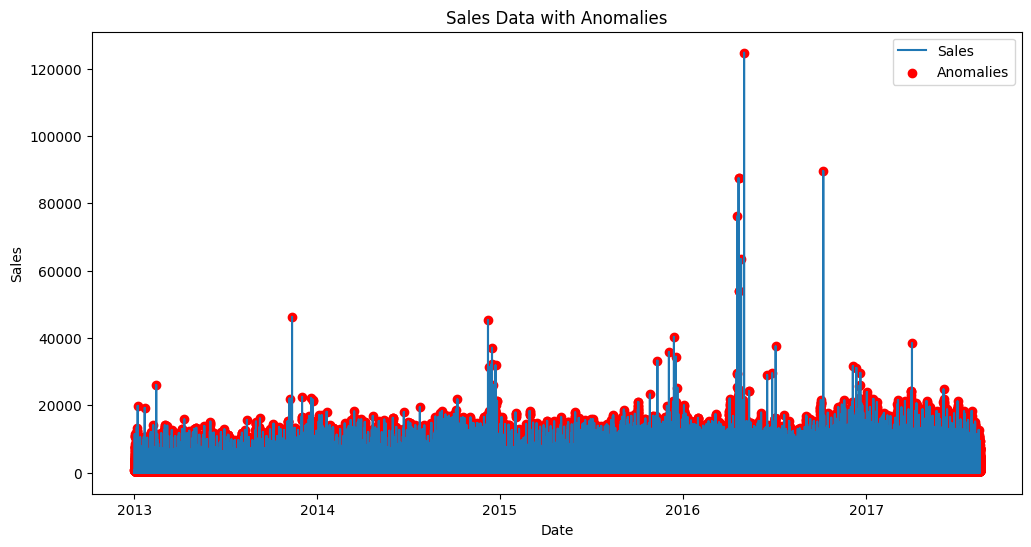

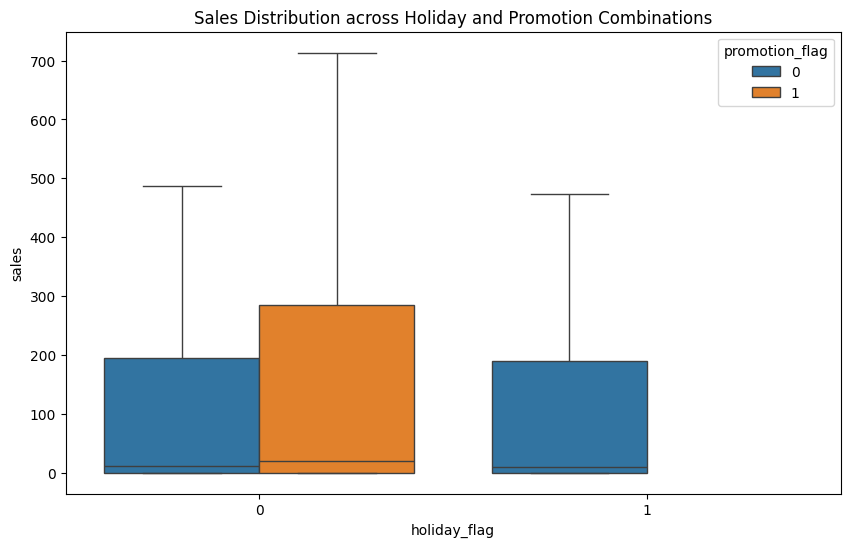

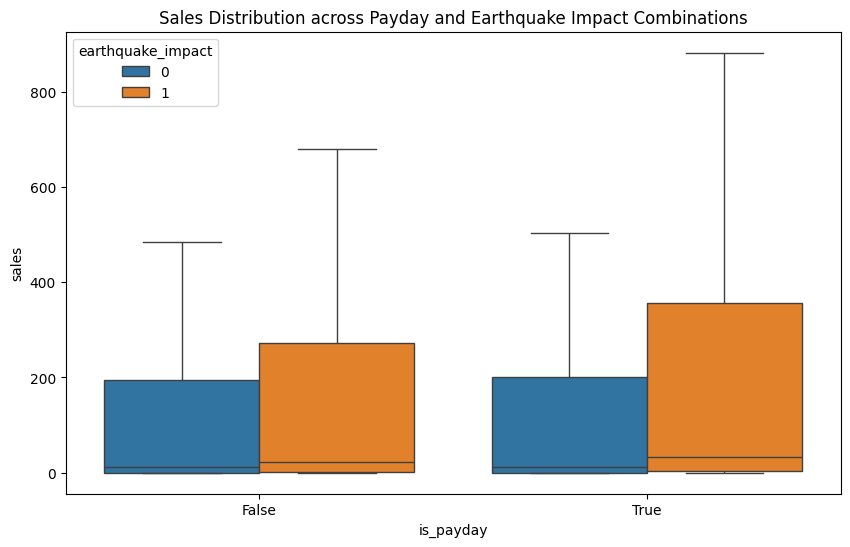

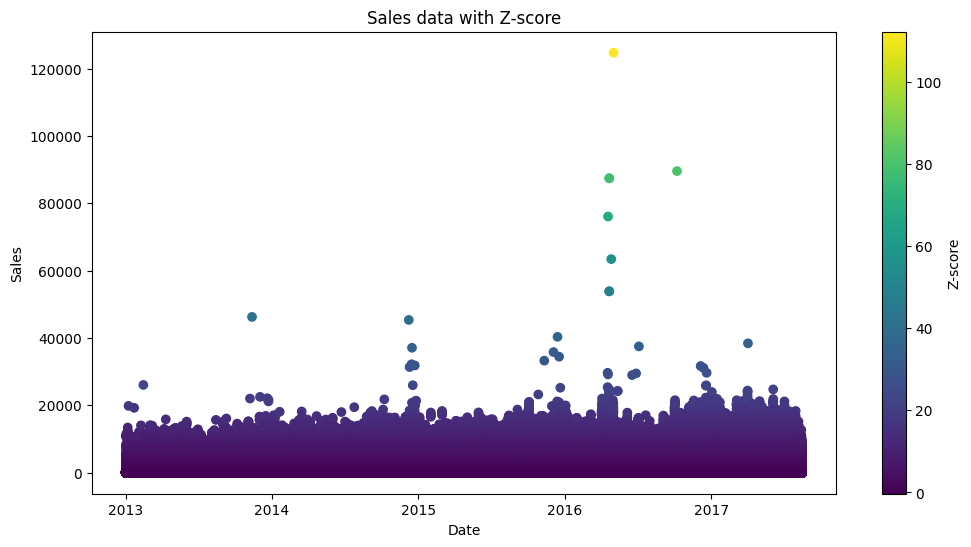

        id       date  store_nbr     family   sales  onpromotion       city  \
1860  1860 2013-01-02         11  GROCERY I  7736.0            0    Cayambe   
2091  2091 2013-01-02         18  GROCERY I  3756.0            0      Quito   
2157  2157 2013-01-02          2  GROCERY I  3870.0            0      Quito   
2322  2322 2013-01-02         24  GROCERY I  3920.0            0  Guayaquil   
2511  2511 2013-01-02          3  BEVERAGES  4486.0            0      Quito   

          state type_x  cluster  ...  promotion_flag economic_event_flag  \
1860  Pichincha      B        6  ...               0                   1   
2091  Pichincha      B       16  ...               0                   1   
2157  Pichincha      D       13  ...               0                   1   
2322     Guayas      D        1  ...               0                   1   
2511  Pichincha      D        8  ...               0                   1   

     is_payday earthquake_impact rolling_mean  rolling_std  sales_la

In [ ]:
# Identify anomalies using the IQR method
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    anomalies = data[(data < lower_bound) | (data > upper_bound)]
    return anomalies

# Find anomalies in sales
sales_anomalies = find_anomalies(train['sales'])

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(train['date'], train['sales'], label='Sales')
plt.scatter(train['date'][sales_anomalies.index], sales_anomalies, color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Data with Anomalies')
plt.legend()
plt.show()


# Analyze sales trends and identify anomalies considering the impact of holidays, promotions, economic events and payday
# (your existing code to calculate holiday_flag, promotion_flag, economic_event_flag, is_payday and earthquake_impact)

# Create a combined visualization (boxplot) to observe sales distributions for different scenarios
plt.figure(figsize=(10,6))
sns.boxplot(x='holiday_flag', y='sales', hue='promotion_flag', data=train, showfliers=False) #showfliers=False to remove outliers
plt.title('Sales Distribution across Holiday and Promotion Combinations')
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x='is_payday', y='sales', hue='earthquake_impact', data=train, showfliers=False)
plt.title('Sales Distribution across Payday and Earthquake Impact Combinations')
plt.show()

#Further analysis
# Statistical tests (t-tests, ANOVA) could be performed to determine if the difference in sales in different categories is statistically significant.

#Z-score method to identify outliers
train['zscore'] = (train['sales']-train['sales'].mean())/train['sales'].std()
plt.figure(figsize=(12, 6))
plt.scatter(train['date'], train['sales'], c=train['zscore']) # Coloring points by Z-score
plt.xlabel('Date')
plt.ylabel('Sales')
plt.colorbar(label='Z-score')
plt.title('Sales data with Z-score')
plt.show()

#Filtering points outside of 3 standard deviations
outliers = train[train['zscore'] > 3]

print(outliers.head())


RMSE: 1954.1614629037113
MAPE: 4.9329250709794035e+17
R-squared: -1.0483405707249553


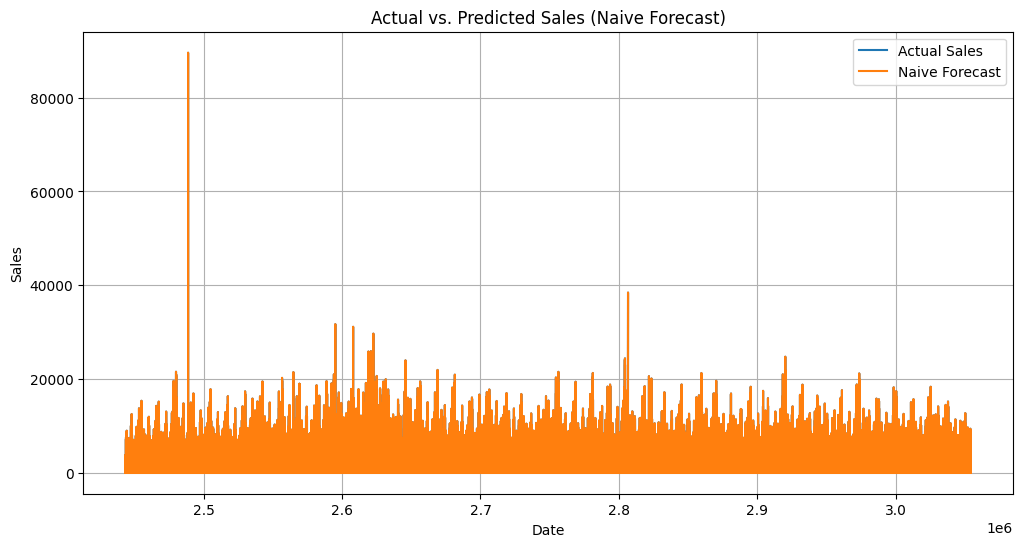

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


def naive_forecast(data, target_column):
    # Create a naive forecast (future sales = previous sales)
    data['naive_forecast'] = data[target_column].shift(1)
    return data

def evaluate_model(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = mean_absolute_percentage_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    return rmse, mape, r2

# Assuming your data is in a DataFrame called 'train' and the target column is 'sales'
# Replace 'train' with the actual name of your DataFrame

# Split data into training and testing sets
train_size = int(len(train) * 0.8)  # Adjust the split ratio as needed
train_data = train[:train_size]
test_data = train[train_size:]


# Apply Naive Forecasting
train_data = naive_forecast(train_data.copy(), 'sales')
test_data = naive_forecast(test_data.copy(), 'sales')


# Evaluate the model on the test set
actual_sales = test_data['sales'][1:] # remove first value due to shift
predicted_sales = test_data['naive_forecast'][1:]
rmse, mape, r2 = evaluate_model(actual_sales, predicted_sales)


print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R-squared: {r2}")

# Visualize actual vs. predicted sales
plt.figure(figsize=(12, 6))
plt.plot(actual_sales.index, actual_sales.values, label='Actual Sales')
plt.plot(predicted_sales.index, predicted_sales.values, label='Naive Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales (Naive Forecast)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

def evaluate_model(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = mean_absolute_percentage_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    return rmse, mape, r2

# Assuming your data is in a DataFrame called 'train' and the target column is 'sales'
# Replace 'train' with the actual name of your DataFrame and 'sales' if different

# Split data into training and testing sets
train_size = int(len(train) * 0.8)  # Adjust the split ratio as needed
train_data = train[:train_size]
test_data = train[train_size:]

# Fit the ARIMA model (example order (p,d,q) - tune these parameters)
model = ARIMA(train_data['sales'], order=(5,1,0)) # Example order, tune as needed
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train_data), end=len(train)-1)

# Evaluate the model
rmse, mape, r2 = evaluate_model(test_data['sales'], predictions)

print(f"ARIMA Model Evaluation:")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R-squared: {r2}")

# Visualize actual vs. predicted sales
plt.figure(figsize=(12, 6))
plt.plot(test_data['date'], test_data['sales'], label='Actual Sales')
plt.plot(test_data['date'], predictions, label='ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset (Ensure 'date' is in datetime format)
train['date'] = pd.to_datetime(train['date'])
train.set_index('date', inplace=True)

# Splitting the dataset
train_size = int(len(train) * 0.8)
train_data, test_data = train[:train_size], train[train_size:]

# Baseline Model: Naïve Forecast (Assume future sales = previous sales)
test_data['naive_pred'] = train_data['sales'].iloc[-1]  # Last observed value


In [ ]:
# Prepare feature matrix
X_train, y_train = train_data.drop(columns=['sales']), train_data['sales']
X_test, y_test = test_data.drop(columns=['sales']), test_data['sales']

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
test_data['rf_pred'] = rf_model.predict(X_test)

# XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
test_data['xgb_pred'] = xgb_model.predict(X_test)


In [ ]:
# Prepare data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=0)

# Predictions
test_data['lstm_pred'] = lstm_model.predict(X_test_lstm).flatten()


In [ ]:
prophet_df = train_data.reset_index().rename(columns={'date': 'ds', 'sales': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)

future_dates = pd.DataFrame(test_data.index).rename(columns={'date': 'ds'})
prophet_forecast = prophet_model.predict(future_dates)
test_data['prophet_pred'] = prophet_forecast['yhat'].values


In [ ]:
def evaluate_model(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = mean_absolute_percentage_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    return rmse, mape, r2

# Storing results
models = ['Naïve', 'ARIMA', 'Random Forest', 'XGBoost', 'LSTM', 'Prophet']
predictions = ['naive_pred', 'arima_pred', 'rf_pred', 'xgb_pred', 'lstm_pred', 'prophet_pred']

results = pd.DataFrame(columns=['Model', 'RMSE', 'MAPE', 'R²'])
for model, pred_col in zip(models, predictions):
    rmse, mape, r2 = evaluate_model(test_data['sales'], test_data[pred_col])
    results = pd.concat([results, pd.DataFrame({'Model': [model], 'RMSE': [rmse], 'MAPE': [mape], 'R²': [r2]})], ignore_index=True)

print(results)


In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data['sales'], label='Actual Sales', color='black', linewidth=2)
for model, pred_col in zip(models, predictions):
    plt.plot(test_data.index, test_data[pred_col], label=model)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()
